In [3]:
rand = 614

In [7]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, make_scorer, accuracy_score,confusion_matrix
from sklearn.metrics import recall_score, precision_score


df_coded = pd.read_csv('../data/processed_and_coded_posts.csv')


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_coded['processed_text'])
y = df_coded['highly_relevant']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.4, random_state=rand, stratify=y)


# Fit the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)


# Get the feature names (keywords)
feature_names = vectorizer.get_feature_names_out()

# Get the model coefficients
coefficients = model.coef_

# Identify the strongest predictors for each category
strongest_predictors = {}

# If binary classification, we need to reshape coefficients to 2D
if coefficients.shape[0] == 1:
    coefficients = np.vstack([coefficients, -coefficients])

for i, category in enumerate(model.classes_):
    sorted_indices = np.argsort(coefficients[i])[::-1]
    strongest_keywords = [feature_names[idx] for idx in sorted_indices[:20]]  # Get top 10 keywords
    strongest_predictors[category] = strongest_keywords

# Print the strongest predictors for each category
for category, keywords in strongest_predictors.items():
    print(f"Strongest predictors for category {category}:")
    print(keywords)



Strongest predictors for category 0:
['medication', 'dbt', 'period', 'taking', 'emotion', 'harming', 'lost', 'lashing', 'therapist', 'week', 'intense', 'day', 'stabilizer', 'hospital', 'bipolar', 'medicine', 'validated', 'intake', 'really', 'appointment']
Strongest predictors for category 1:
['friend', 'relationship', 'he', 'time', 'fp', 'thing', 'person', 'people', 'she', 'try', 'everything', 'love', 'say', 'it', 'back', 'partner', 'care', 'month', 'keep', 'mental']


For some reason, the predictors seem to be backwards, but I'm not sure what is going on here.

In [10]:
y_pred_prob_holdout = model.predict_proba(X_holdout)[:, 1]  # Get probabilities for the positive class



# Adjust the threshold
# The threshold is less than 0.5 to increase sensitivity,
# We set it to this since 4% posts are highly relevant
threshold = 0.04
y_pred_holdout = (y_pred_prob_holdout >= threshold).astype(int)

print("\nEvaluation on the hold-out set with adjusted threshold:")
print(classification_report(y_holdout, y_pred_holdout))
print(confusion_matrix(y_holdout, y_pred_holdout))


Evaluation on the hold-out set with adjusted threshold:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       232
           1       0.14      0.75      0.24         8

    accuracy                           0.84       240
   macro avg       0.57      0.80      0.58       240
weighted avg       0.96      0.84      0.89       240

[[196  36]
 [  2   6]]


In [5]:
cutoffs = np.arange(0.01,.99,.01)

prec_scores = []
rec_scores = []

for cutoff in cutoffs:
    y_pred_holdout = (y_pred_prob_holdout >= cutoff).astype(int)
    
    prec_scores.append(precision_score(y_holdout, y_pred_holdout))
    rec_scores.append(recall_score(y_holdout, y_pred_holdout))

/Users/gkhan/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gkhan/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gkhan/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gkhan/Librar

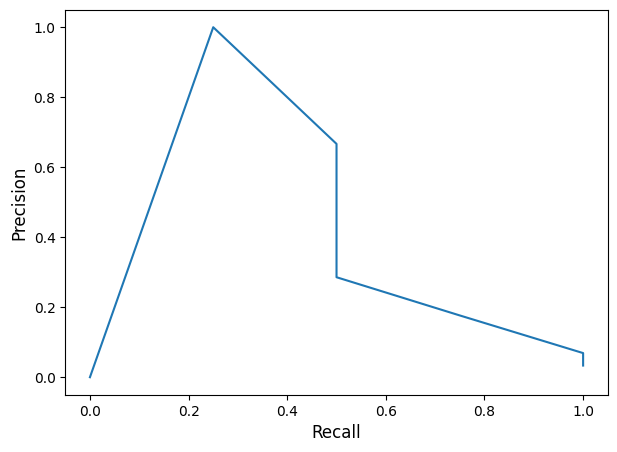

In [6]:
plt.figure(figsize=(7,5))

plt.plot(rec_scores, prec_scores)

plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Running the same model on is_relevant to find negative keywords

In [10]:
from sklearn.model_selection import StratifiedKFold

kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 582)

In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_coded['processed_text'])
y = df_coded['is_relevant']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Fit the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)


# Get the feature names (keywords)
feature_names = vectorizer.get_feature_names_out()

# Get the model coefficients
coefficients = model.coef_

# Identify the strongest predictors for each category
strongest_predictors = {}

# If binary classification, we need to reshape coefficients to 2D
if coefficients.shape[0] == 1:
    coefficients = np.vstack([coefficients, -coefficients])

for i, category in enumerate(model.classes_):
    sorted_indices = np.argsort(coefficients[i])[::-1]
    strongest_keywords = [feature_names[idx] for idx in sorted_indices[:20]]  # Get top 10 keywords
    strongest_predictors[category] = strongest_keywords

# Print the strongest predictors for each category
for category, keywords in strongest_predictors.items():
    print(f"Strongest predictors for category {category}:")
    print(keywords)

Strongest predictors for category 0:
['therapy', 'psychiatrist', 'therapist', 'diagnosis', 'medication', 'dbt', 'med', 'diagnosed', 'symptom', 'would', 'abilify', 'cptsd', 'last', 'doctor', 'session', 'feeling', 'week', 'two', 'tried', 'treatment']
Strongest predictors for category 1:
['relationship', 'he', 'friend', 'together', 'fp', 'thing', 'people', 'person', 'partner', 'know', 'broke', 'dating', 'wish', 'around', 'everything', 'guy', 'constantly', 'healthy', 'doesn', 'everyone']
